# Exploratory Data Analysis - Terrorism

In [3]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
#load the dataset
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
data.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_59724\1507126820.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [53]:
data.shape

(181691, 135)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
#select the columns we will use in this analysis
data_col = data[['eventid', 'iyear','success','imonth', 'iday', 'country_txt','region_txt','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','nkill']]

In [11]:
data_col.head()

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0
2,197001000001,1970,1,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0
3,197001000002,1970,1,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN
4,197001000003,1970,1,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN


In [12]:
data_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   success          181691 non-null  int64  
 3   imonth           181691 non-null  int64  
 4   iday             181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   region_txt       181691 non-null  object 
 7   suicide          181691 non-null  int64  
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  target1          181055 non-null  object 
 11  nkill            171378 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 16.6+ MB


In [13]:
data_col.isna().sum()

eventid                0
iyear                  0
success                0
imonth                 0
iday                   0
country_txt            0
region_txt             0
suicide                0
attacktype1_txt        0
targtype1_txt          0
target1              636
nkill              10313
dtype: int64

Here we have some missing values in target1 and nkill. Replace the null values for target1 with the word 'Unknown.

In [14]:
data_col['target1']=data_col['target1'].fillna('unknown')

C:\Users\Admin\AppData\Local\Temp\ipykernel_59724\3014906447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_col['target1']=data_col['target1'].fillna('unknown')


In [20]:
data_col['nkill']=data_col['nkill'].fillna(0.0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_59724\1624634287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_col['nkill']=data_col['nkill'].fillna(0.0)


In [21]:
data_col.isna().sum()

eventid            0
iyear              0
success            0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
dtype: int64

# Exploratory Data Analysis

In [22]:
# trends over the years for the world

yearly_attacks = data_col.groupby('iyear').size().reset_index(name='count')

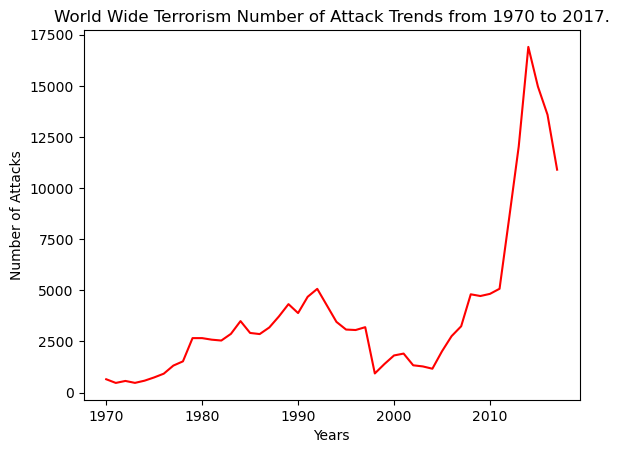

In [24]:
sns.lineplot(x='iyear', y='count', data=yearly_attacks, color= "red")
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title('World Wide Terrorism Number of Attack Trends from 1970 to 2017.')
plt.show()

In [25]:
# Terrorist Attack trends based on the region

yearly_attacks_region = data_col.groupby(['iyear', 'region_txt']).size().reset_index(name='count')


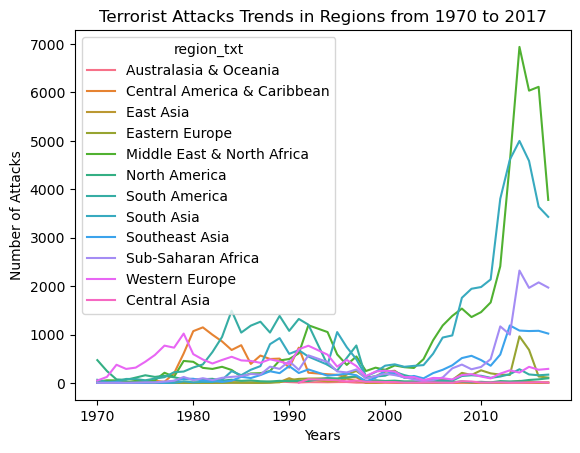

In [26]:
sns.lineplot(x='iyear', y='count',hue='region_txt', data=yearly_attacks_region )
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

In [27]:
yearly_attacks_region

,iyear,region_txt,count
0,1970,Australasia & Oceania,1
1,1970,Central America & Caribbean,7
2,1970,East Asia,2
3,1970,Eastern Europe,12
4,1970,Middle East & North Africa,28
...,...,...,...
524,2017,South America,172
525,2017,South Asia,3430
526,2017,Southeast Asia,1020
527,2017,Sub-Saharan Africa,1970


In [28]:
# Countries with the most terrorist attacks

country_attacks = data_col.groupby('country_txt').size().reset_index(name='count').sort_values(by='count', ascending = False)
top5_country = country_attacks.head(5)

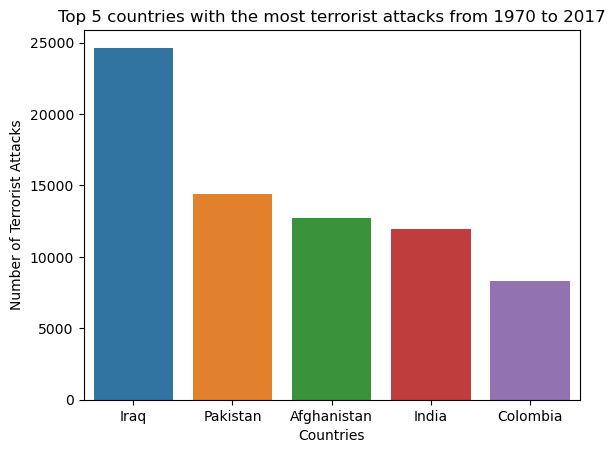

In [29]:
sns.barplot(x='country_txt', y='count', data=top5_country)
plt.title('Top 5 countries with the most terrorist attacks from 1970 to 2017')
plt.xlabel('Countries')
plt.ylabel('Number of Terrorist Attacks')
plt.show()

In [31]:
country_attacks_after_2012 = data_col[data_col['iyear'] >= 2012]
country_attacks_after_2012_count = country_attacks_after_2012.groupby(['iyear', 'country_txt']).size().reset_index(name='count')

# Get the top 5 countries for each year
country_attacks_after_2012_5 = country_attacks_after_2012_count.groupby('iyear').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

In [32]:
country_attacks_after_2012_5

,iyear,country_txt,count
0,2012,Pakistan,1654
1,2012,Afghanistan,1469
2,2012,Iraq,1437
3,2012,Nigeria,616
4,2012,India,611
5,2013,Iraq,2852
6,2013,Pakistan,2215
7,2013,Afghanistan,1443
8,2013,India,694
9,2013,Philippines,651


<AxesSubplot:xlabel='iyear', ylabel='count'>

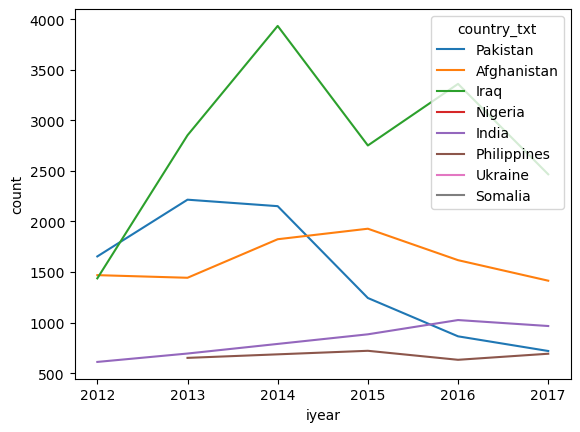

In [33]:
sns.lineplot(x='iyear', y='count', hue='country_txt', data=country_attacks_after_2012_5)

In [35]:
# success of the terrorist attacks over the years
total_count = data_col['success'].count()
success = data_col.groupby('success').size().reset_index(name="count")
success['percentage'] = (success['count'] / total_count) * 100
success

,success,count,percentage
0,0,20059,11.040173
1,1,161632,88.959827


Text(0.5, 1.0, 'Success rate of Terrorist attacks from 2012 to 2017')

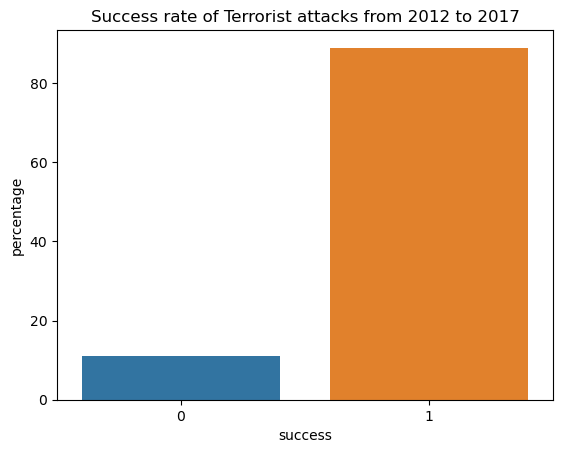

In [36]:
sns.barplot(x='success', y= 'percentage',data = success)
plt.title('Success rate of Terrorist attacks from 2012 to 2017')

In [37]:
attack_type = data_col.groupby(['attacktype1_txt', 'success']).size().reset_index(name="count")
attack_type

,attacktype1_txt,success,count
0,Armed Assault,0,2324
1,Armed Assault,1,40345
2,Assassination,0,4697
3,Assassination,1,14615
4,Bombing/Explosion,0,10725
5,Bombing/Explosion,1,77530
6,Facility/Infrastructure Attack,0,577
7,Facility/Infrastructure Attack,1,9779
8,Hijacking,0,80
9,Hijacking,1,579


Text(0, 0.5, 'Number of Attacks')

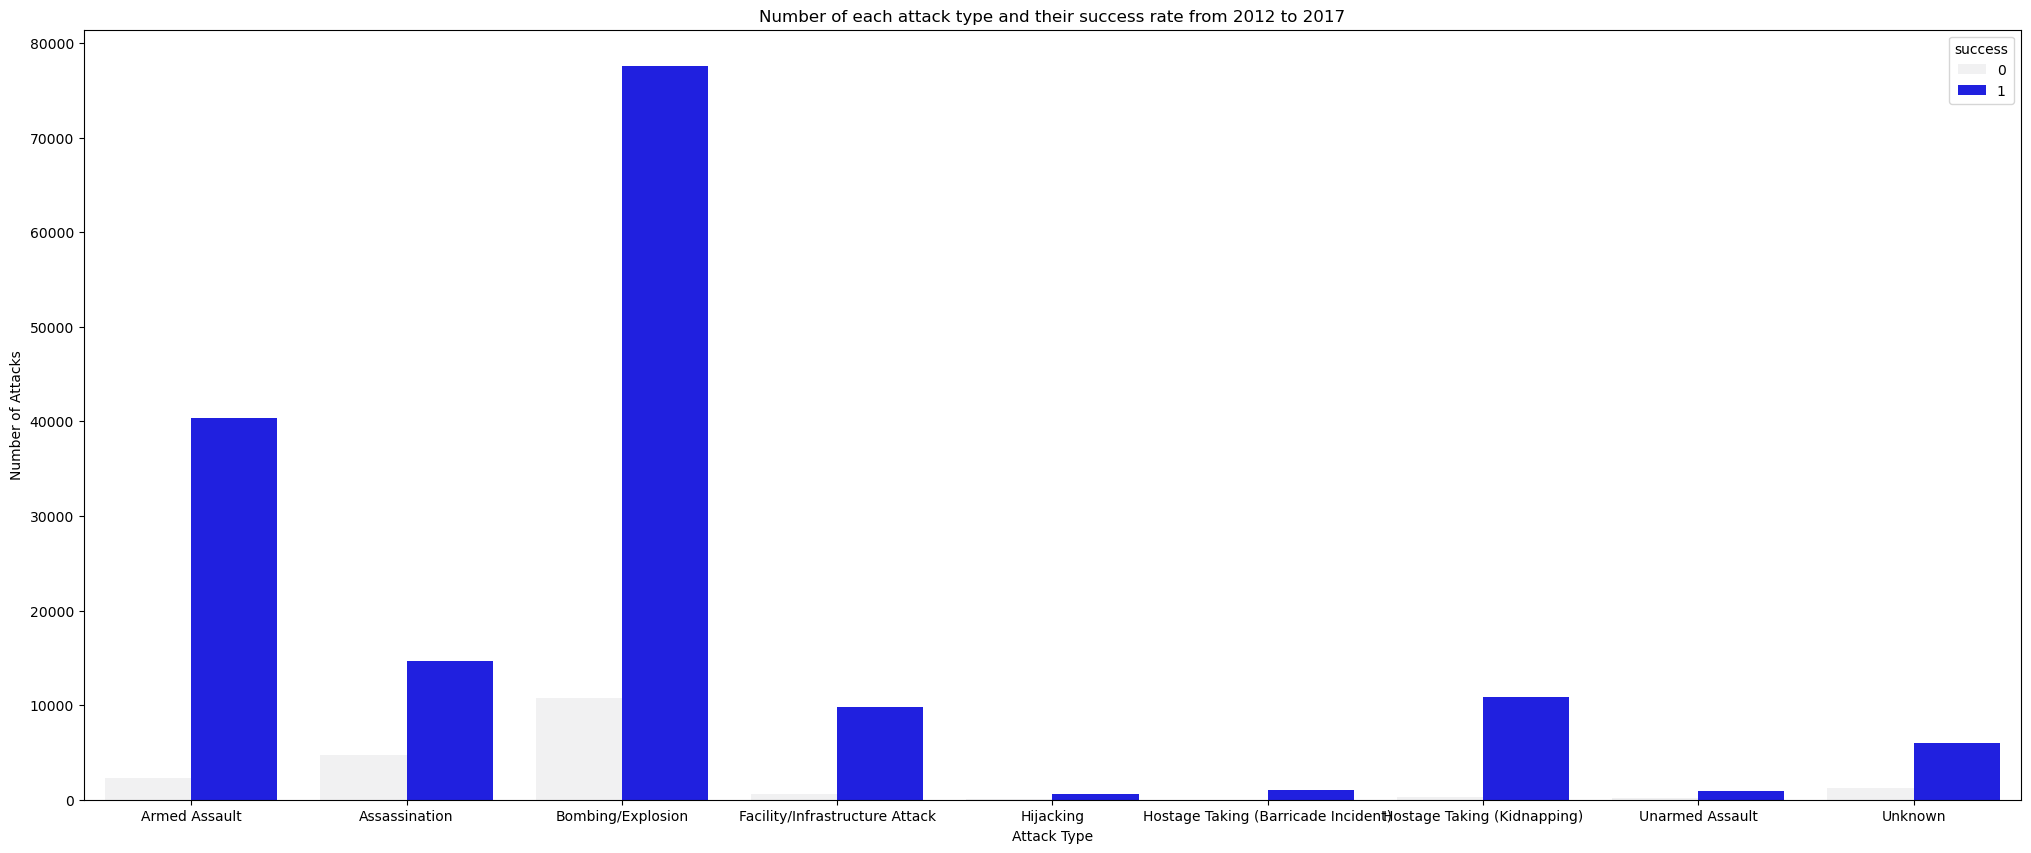

In [39]:
plt.figure(figsize=(25,10))
plt.title('Number of each attack type and their success rate from 2012 to 2017')
sns.barplot(x='attacktype1_txt', y='count', hue='success', data=attack_type, color= "blue")
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')

In [40]:
# Casualties due to Terrorist Attacks around the world

nkills_attack = data_col.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkills_attack

,attacktype1_txt,nkill
0,Armed Assault,160297.0
1,Assassination,24920.0
2,Bombing/Explosion,157321.0
3,Facility/Infrastructure Attack,3642.0
4,Hijacking,3718.0
5,Hostage Taking (Barricade Incident),4478.0
6,Hostage Taking (Kidnapping),24231.0
7,Unarmed Assault,880.0
8,Unknown,32381.0


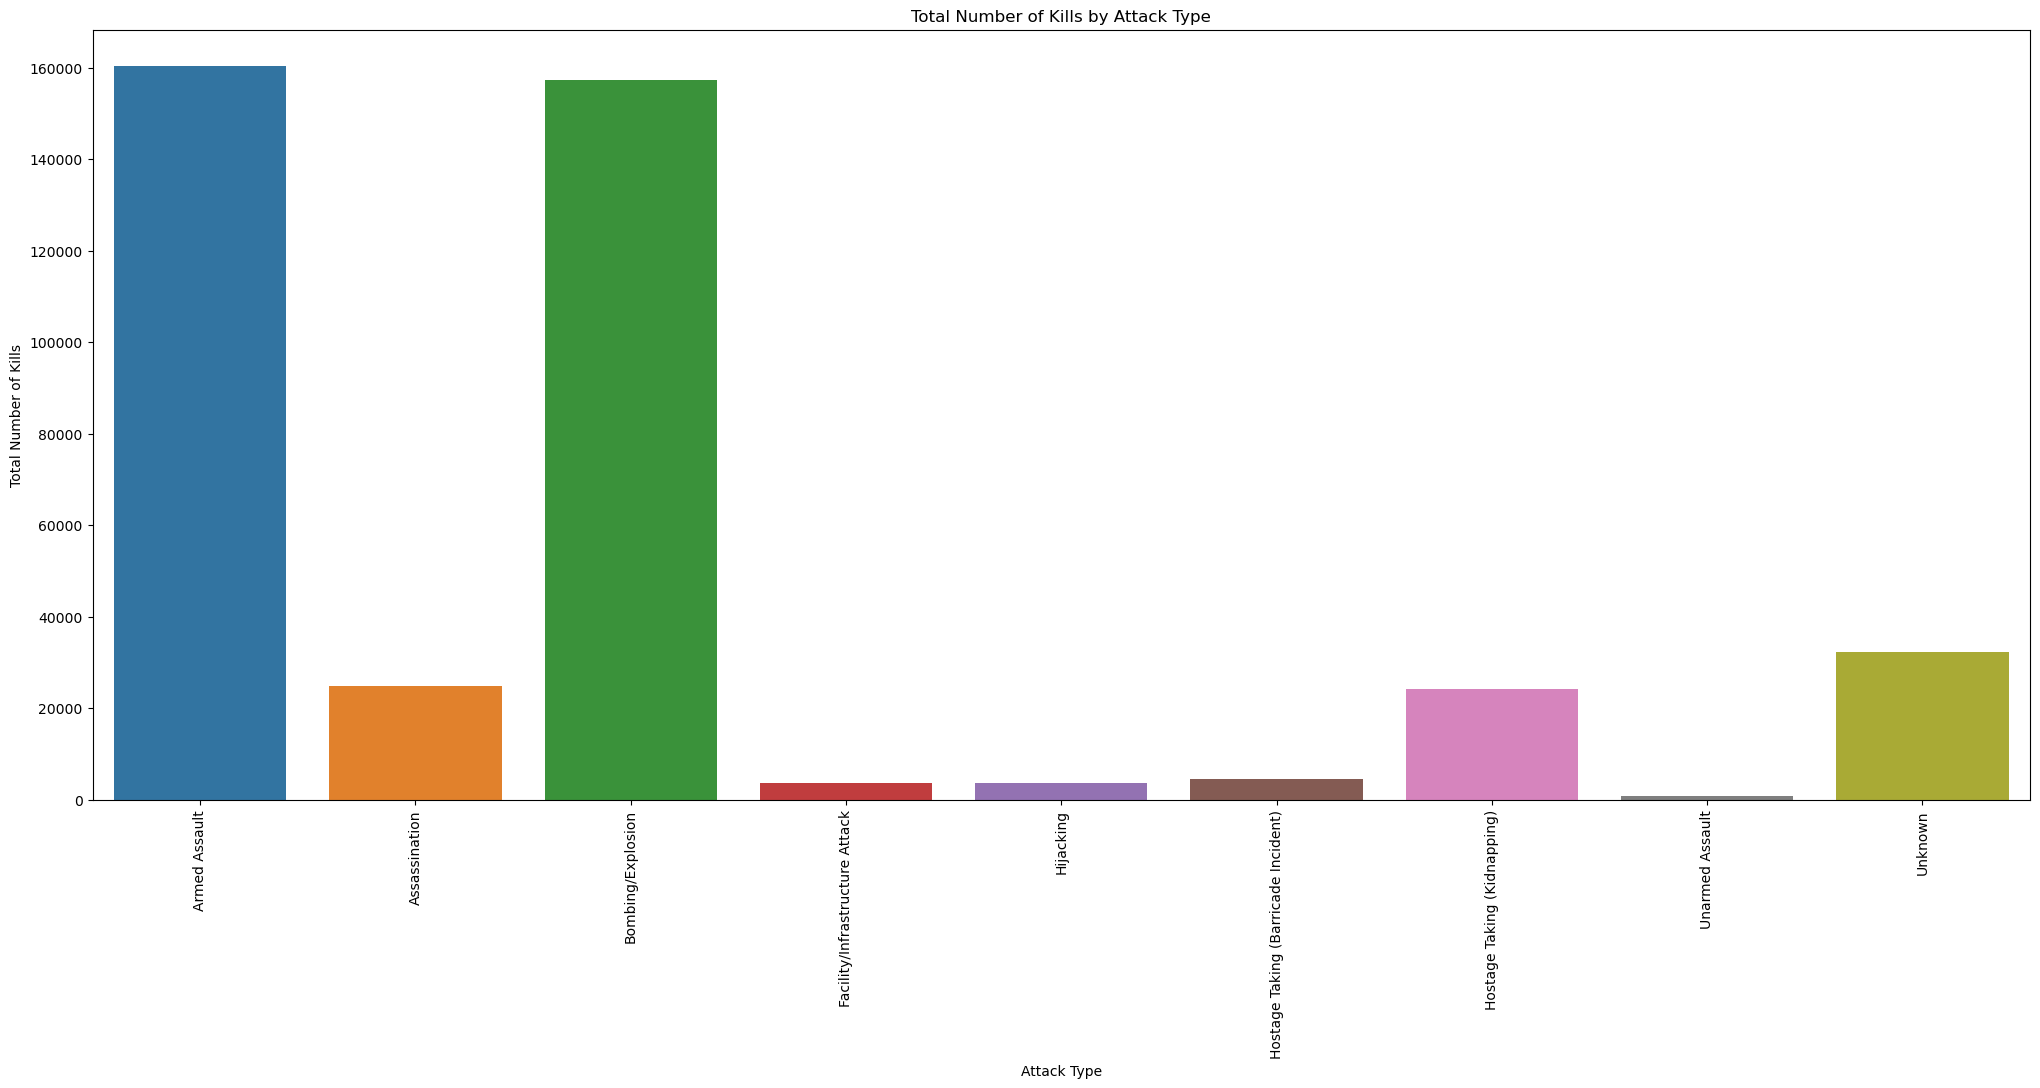

In [41]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkills_attack)
plt.xlabel('Attack Type')
plt.ylabel('Total Number of Kills')
plt.title('Total Number of Kills by Attack Type')
plt.xticks(rotation=90)
plt.show()

## Analyse the Japan and India countries

In [71]:
mycountries = data_col[(data_col['country_txt'] == 'Japan') | (data_col['country_txt'] == 'India')]
mycountries.head()

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
4,197001000003,1970,1,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0.0
162,197003310002,1970,1,3,31,Japan,East Asia,0,Hijacking,Airports & Aircraft,Boeing 727,0.0
1186,197202220004,1972,1,2,22,India,South Asia,0,Hijacking,Airports & Aircraft,B-747,0.0
1851,197304250001,1973,1,4,25,Japan,East Asia,0,Facility/Infrastructure Attack,Military,US Ikego Ammo Storage Area,0.0
2003,197308290001,1973,1,8,29,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Embassy Annex,0.0


In [55]:
# Terrorist Attacks in Japan
japan = data_col[(data_col['country_txt'] =='Japan')]
num_ofattacks = japan.groupby('iyear').size().reset_index(name="count")
num_ofattacks

,iyear,count
0,1970,2
1,1973,2
2,1974,3
3,1975,12
4,1976,1
5,1977,4
6,1978,35
7,1979,16
8,1981,1
9,1982,2


In [56]:
japan_sumattacks = num_ofattacks['count'].sum()
japan_sumattacks
print('Total Number of attacks in Japan is', japan_sumattacks)

Total Number of attacks in Japan is 402


<AxesSubplot:title={'center':'Yearly Trend of Terrorist Attcks in Japan from 1974 to 2017'}, xlabel='Year', ylabel='Number of Attacks'>

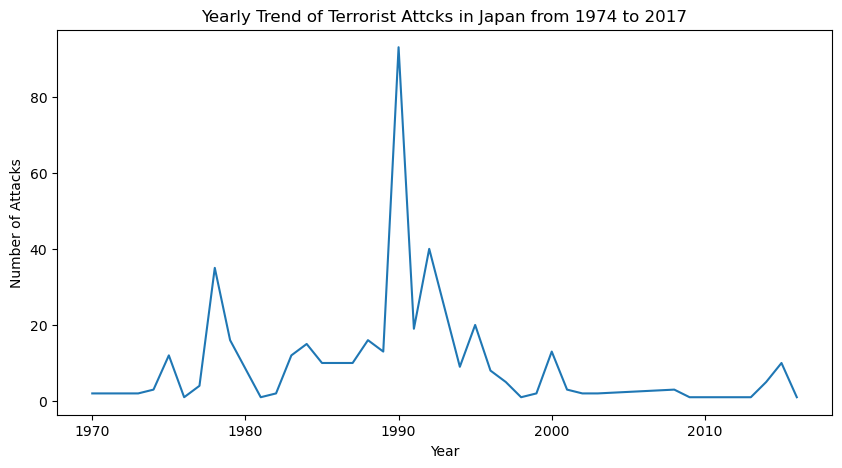

In [57]:
plt.figure(figsize=(10,5))
plt.title("Yearly Trend of Terrorist Attcks in Japan from 1974 to 2017")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
sns.lineplot(x="iyear", y="count", data=num_ofattacks)

In [58]:
# success rate of the attacks over the years

succ_japan = japan.groupby(['success']).size().reset_index(name='count')
succ_japan['percentage'] = succ_japan['count']/ japan_sumattacks *100
succ_japan

,success,count,percentage
0,0,61,15.174129
1,1,341,84.825871


Text(0.5, 0, 'Outcome')

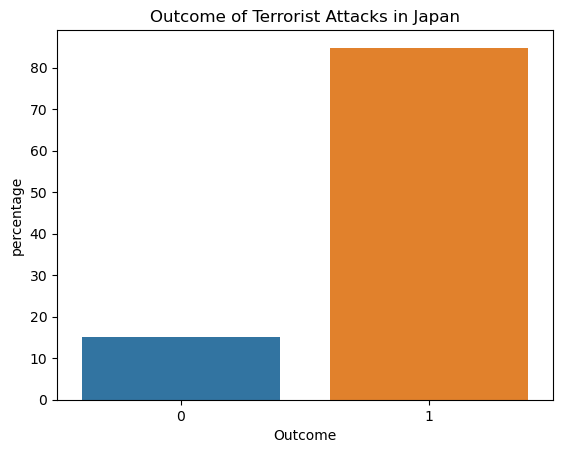

In [59]:
sns.barplot(x = 'success', y = 'percentage', data=succ_japan)
plt.title("Outcome of Terrorist Attacks in Japan")
plt.xlabel("Outcome")

In [60]:
# Terrorist Attack Types in Japan

japan_atype= japan.groupby(['attacktype1_txt','success']).size().reset_index(name='count')
japan_atype

,attacktype1_txt,success,count
0,Armed Assault,0,2
1,Armed Assault,1,45
2,Assassination,0,9
3,Assassination,1,13
4,Bombing/Explosion,0,19
5,Bombing/Explosion,1,109
6,Facility/Infrastructure Attack,0,13
7,Facility/Infrastructure Attack,1,149
8,Hijacking,1,3
9,Hostage Taking (Barricade Incident),1,3


Text(0.5, 0, 'Attack Type')

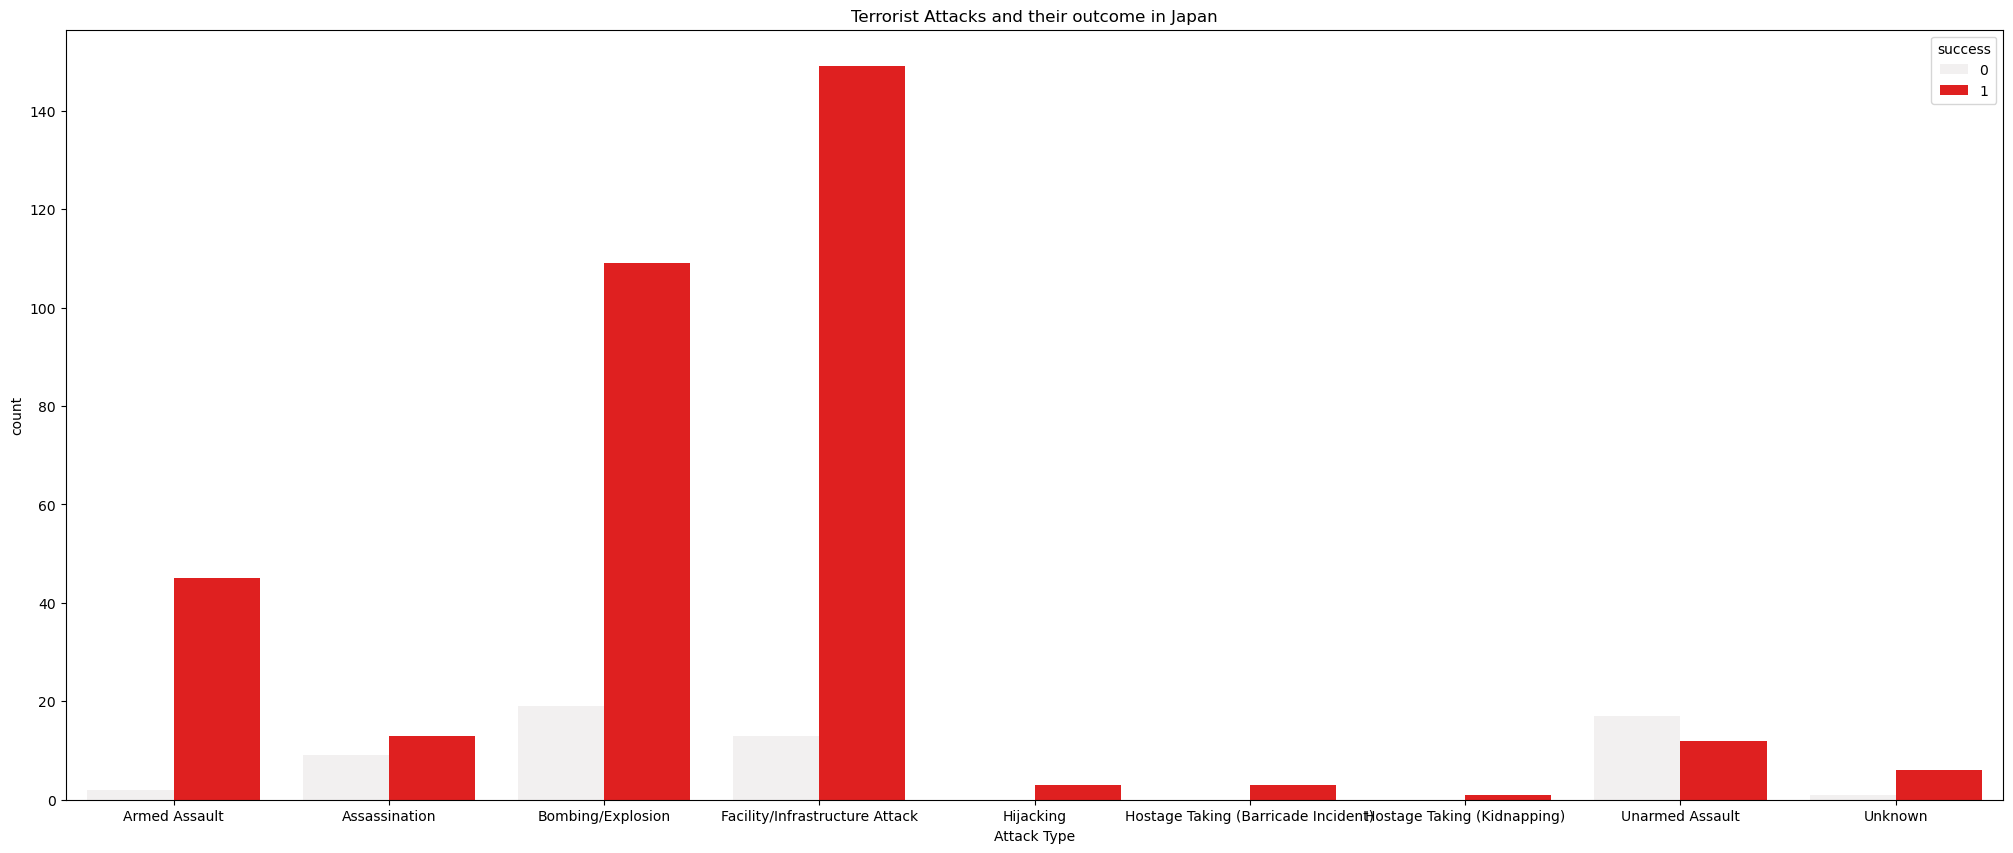

In [61]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='count', hue= 'success', data=japan_atype, color="red")
plt.title("Terrorist Attacks and their outcome in Japan")
plt.xlabel("Attack Type")


In [62]:
# Attacks Types in Japan and Casualties

nkillattack_japan = japan.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkillattack_japan

,attacktype1_txt,nkill
0,Armed Assault,3.0
1,Assassination,7.0
2,Bombing/Explosion,6.0
3,Facility/Infrastructure Attack,5.0
4,Hijacking,0.0
5,Hostage Taking (Barricade Incident),19.0
6,Hostage Taking (Kidnapping),0.0
7,Unarmed Assault,23.0
8,Unknown,3.0


Text(0.5, 0, 'Attack type')

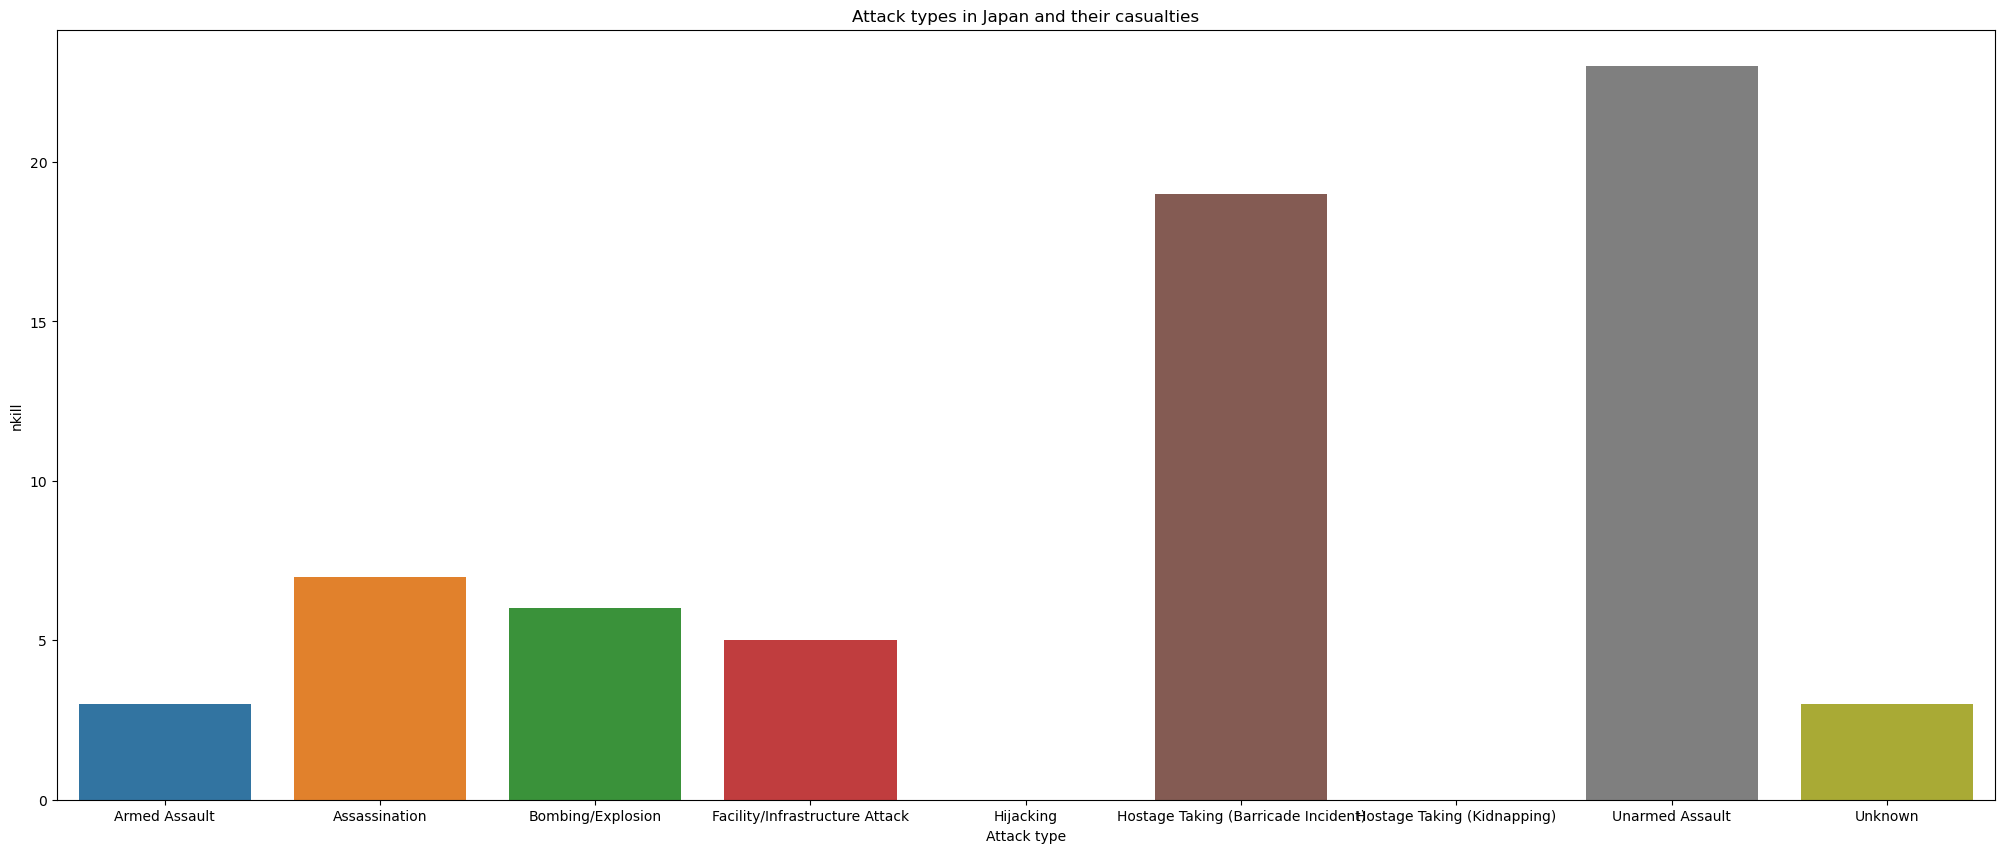

In [63]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkillattack_japan)
plt.title("Attack types in Japan and their casualties")
plt.xlabel("Attack type")

In [65]:
# Terrorist Attacks in India
india = data_col[(data_col['country_txt'] =='India')]
num_ofattacks = india.groupby('iyear').size().reset_index(name="count")
num_ofattacks

,iyear,count
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20
5,1980,10
6,1981,16
7,1982,13
8,1983,47
9,1984,159


In [66]:
india_sumattacks = num_ofattacks['count'].sum()
india_sumattacks
print('Total Number of attacks in India is', india_sumattacks)

Total Number of attacks in India is 11960


<AxesSubplot:title={'center':'Yearly Trend of Terrorist Attcks in India from 1974 to 2017'}, xlabel='Year', ylabel='Number of Attacks'>

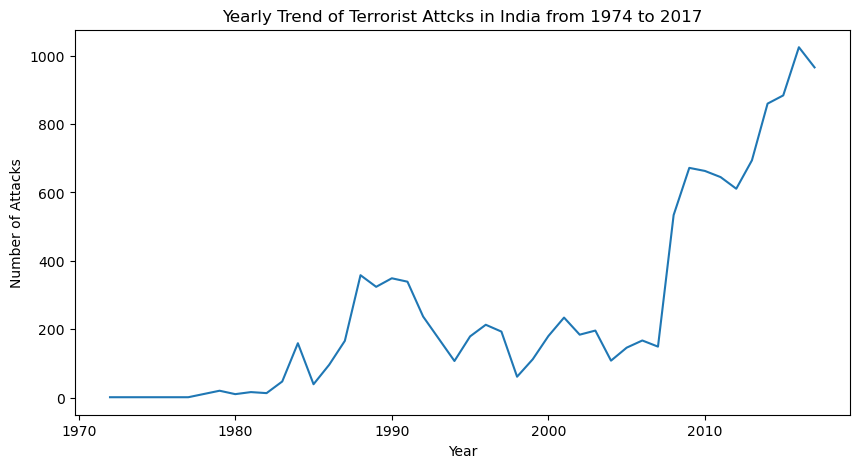

In [67]:
plt.figure(figsize=(10,5))
plt.title("Yearly Trend of Terrorist Attcks in India from 1974 to 2017")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
sns.lineplot(x="iyear", y="count", data=num_ofattacks)

Text(0.5, 0, 'Outcome')

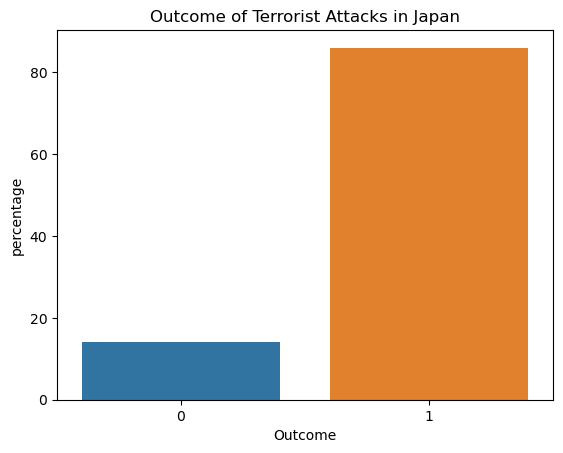

In [68]:
# success rate of the attacks over the years

succ_india = india.groupby(['success']).size().reset_index(name='count')
succ_india['percentage'] = succ_india['count']/ india_sumattacks *100

sns.barplot(x = 'success', y = 'percentage', data=succ_india)
plt.title("Outcome of Terrorist Attacks in Japan")
plt.xlabel("Outcome")

Text(0.5, 0, 'Attack Type')

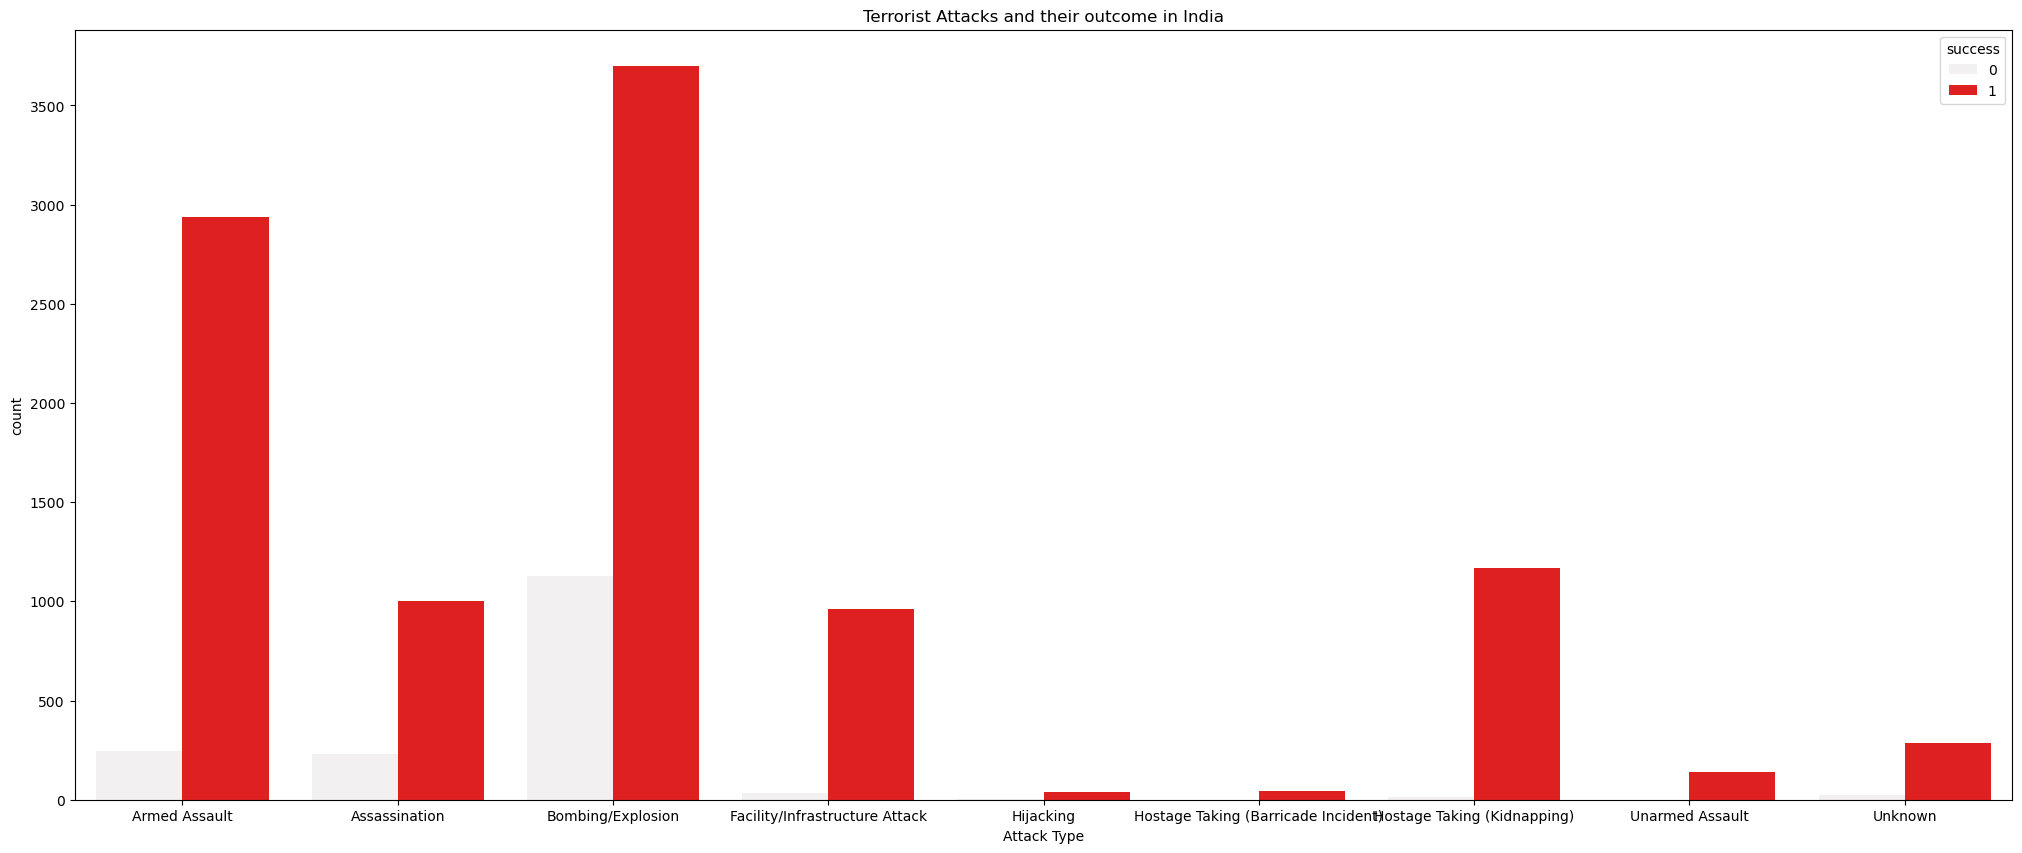

In [69]:
# Terrorist Attack Types in Japan

india_atype= india.groupby(['attacktype1_txt','success']).size().reset_index(name='count')
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='count', hue= 'success', data=india_atype, color="red")
plt.title("Terrorist Attacks and their outcome in India")
plt.xlabel("Attack Type")

Text(0.5, 0, 'Attack type')

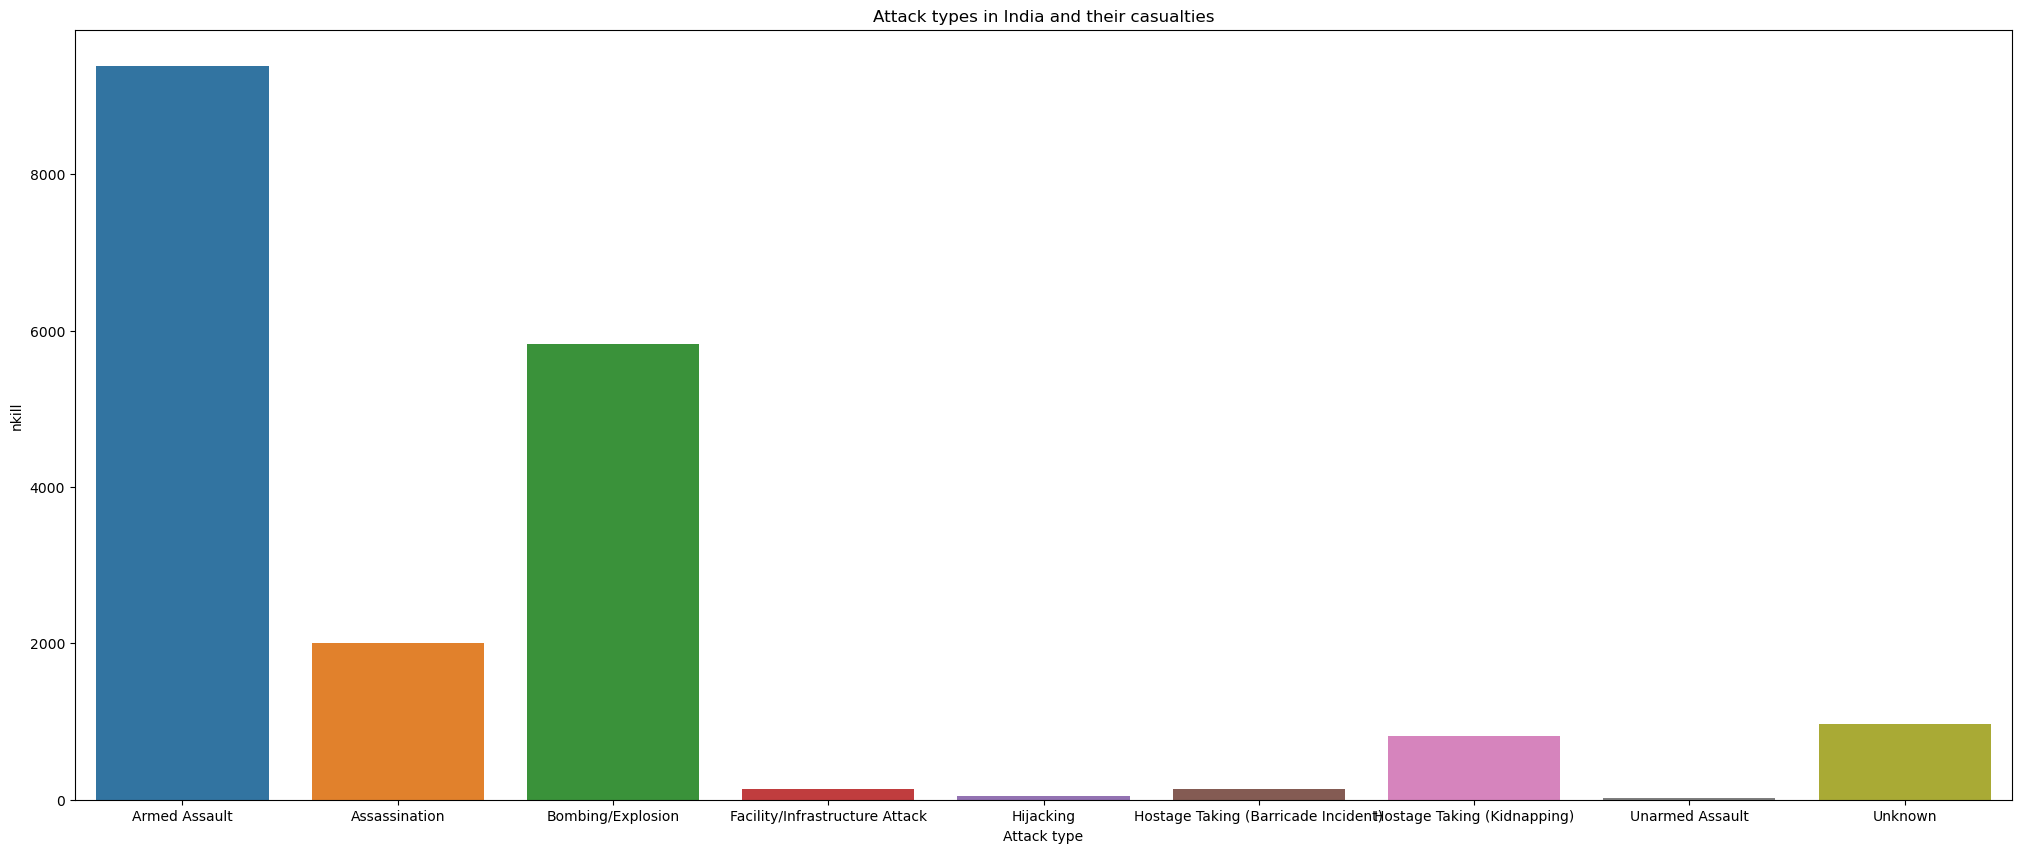

In [70]:
# Attacks Types in India and Casualties

nkillattack_india = india.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkillattack_india)
plt.title("Attack types in India and their casualties")
plt.xlabel("Attack type")

## Conclusion

Terrorism Attacks all around the world is becoming increasingly a problem And number of terrorist attacks in the Middle East and North Africa and South America increased significantly. 89% of attacks have been successful, with armed asssault being the most used terrorist attacks and armed assault and bombing/ explosion causing the most casualties